# War Thunder grind investigation

This jupyter notebook aims to prove to some extent the sheer amount of grind there is in War Thunder.

## Theoretical introduction

In War Thunder players play against each other in battles, and depending on their performance they then gain in game currency which they can then spend on vehicles.
The game is well known in the gaming community for the time it takes for average players to acquire vehicles.
This phenomenon has been dubbed "grind".
The game has hundreds of vehicles, all rated with rating called battle rating (b.r.) in such a way to give the illusion of an historical yet balanced game.  
The rough time it takes to unlock the vehicle depends on player performance, the vehicle that the player is using and the cost of the vehicle being unlocked. 
All vehicles have their own earning modifiers, with latter more expensive vehicles having better modifiers.
Player earnings in consecutive battles then can be described as a series:

$$
a_n = S * L * V_m
$$

Where S stands for player skill, L for luck, and $V_m$ stands for the player vehicle research modifier.
We will assume for simplicity's sake that luck and player skill are more or less constant and average out to $C = S * L$.
That simplifies the series equation to:

$$
a_n = C * V_m
$$

That means that we can describe the average amount of battles it takes to unlock a given vehicle with the research cost of $V_c$ as:

$$
\frac{V_c}{\sum_{n=0}a_n}
$$

With n being the number of battles.
In order to determine how many battles you need to play to unlock a vehicle use this equation:

$$
\frac{V_c}{n * C * V_m} = 1
$$

with C being your average earnings per battle.

## Modifier regularities

Generally vehicle modifiers tend to grow with vehicle b.r.
This means that we can create a rough estimate of what the vehicle modifier is for each b.r. and wrap it in a function.
For in game German vehicles the following function value table applies:

| t - b.r. | m(t) - example r.p. |
|----------|---------------------|
| 1.0      | 1.0                 |
| 3.7      | 1.24                |
| 5.7      | 1.48                |
| 6.7      | 1.78                |
| 11.7     | 2.6                 |

Below is a python script that calculates a line equation that approximates the multiplier values for any b.r.


In [6]:
import numpy as np

# Define the x and y values from the data table
x = [1.0, 3.7, 5.7, 6.7, 11.7]
y = [1.0, 1.24, 1.48, 1.78, 2.6]

# Fit a polynomial of degree 1 (linear fit) to the data
mcoefficients = np.polyfit(x, y, 1)

# Extract the slope and intercept from the coefficients
slope = mcoefficients[0]
intercept = mcoefficients[1]

#round to the nearest 4 decimal places

slope = round(slope, 4)
intercept = round(intercept, 4)

# Print the best fit function
print(f"Best fit function: y = {slope} * x + {intercept}")

# Calculate the predicted y-values from the linear fit
predicted_y = np.polyval(mcoefficients, x)

# Calculate the residuals (differences between actual y-values and predicted y-values)
residuals = y - predicted_y

# Calculate the mean squared error
mse = np.mean(residuals**2)

# Print the mean squared error
print(f"Mean Squared Error: {mse}")

Best fit function: y = 0.154 * x + 0.7329
Mean Squared Error: 0.007660707762557092


$$
m(t) \approx 0.154t + 0.7329
$$

And having this approximation with a small enough error for what we are doing here we can do cool things like estimate what b.r. a 300% research modifier would be:

$$
m(t) = 3.0 \\
0.154t + 0.7329 = 3.0 \\
0.154t = 2.2671 \\ 
t \approx 14.7 \\
$$

## Research cost regularities

Now let's find a similar approximation for research costs

| t - b.r. | c(t) - example r.p. |
|----------|---------------------|
| 1.0      | 0                   |
| 3.7      | 11000               |
| 5.7      | 33000               |
| 6.7      | 71000               |
| 11.7     | 420000              |


In [7]:
import numpy as np

# Define the x and y values from the data table
x = [1.0, 3.7, 5.7, 6.7, 11.7]
y = [0, 11000, 33000, 71000, 420000]

# Fit a polynomial of degree 4 to the data
coefficients = np.polyfit(x, y, 4)

coefficients = np.around(coefficients, 5)

print(f"Function coefficients: {coefficients}")

# Calculate the predicted y-values from the fit
predicted_y = np.polyval(coefficients, x)

# Calculate the residuals (differences between actual y-values and predicted y-values)
residuals = y - predicted_y

# Calculate the mean squared error
mse = np.mean(residuals**2)

# Print the mean squared error
print(f"Mean Squared Error: {mse}")

Function coefficients: [  -166.62812   4169.7616  -28949.91367  74961.25748 -50014.47729]
Mean Squared Error: 0.0016627920005055532


$$
c(t) \approx -166.62812t^4 + 4169.7616t^3 - 28949.91367t^2 + 74961.25748t -50014.47729
$$

So now we have two functions, with $\epsilon$(error) $\epsilon < 0.01$ and we can, for example, determine what b.r. a tank would have to be to cost 500,000 r.p.

## Quantifying the grind

Now that we have the basics laid out, we can move onto trying to define and quanitify in some way the amount of grind with the current in game economy settings.
Coming back to the equation for the number of battles we can now use the previously defined functions to define the average number of battles per b.r.

$$
\frac{c(t)}{nC * m(t)} = 1 \\
\frac{c(t)}{nCm(t)} = 1 \\
\frac{c(t)}{m(t)} = nC
$$

for a given t. Now let's try and simplify this further. Since C is constant, yet undefined, let's just ignore it for now and assume $C \ge 1$.

$$
\frac{c(t)}{m(t)} = n \\
$$

So for t=1

$$
\frac{-166.62812 + 4169.7616 - 28949.91367 + 74961.25748 -50014.47729}{0.154 + 0.7329} = n \\
\frac{0}{0.8869} = n \\
n=0
$$

Let's make this a function $b(t)$ for battles needed for each br to unlock average vehicle.

$$
b(t) = \frac{c(t)}{m(t)}
$$

A very important observation to make about this function is that:

$$
\lim\limits_{t\to\infty} b(t) = \infty
$$

Which means that $c(t)$ grows faster with t than $m(t)$.
Costs grow faster than the multiplier, and since C is const (and realistically speaking:capped in game) as t nears infinity the amount of battles also approaches infinity.
Below the shape of the curve with C=1 is shown.
The curve isn't meant to be used to get the exact values but the shape of the curve should be similar to what players experience in game.
Also bear in mind this curve sort of represents the best case scenario with the b.r. difference being totally ignored.

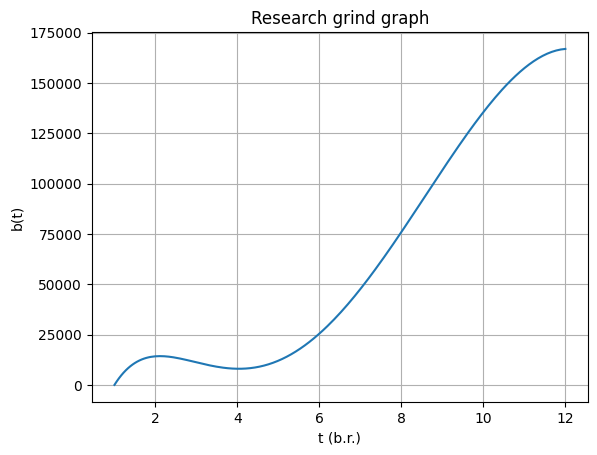

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function b(t)
def b(t):
    return np.polyval(coefficients, t) / np.polyval(mcoefficients, t)

# Generate x values from 1 to 12
x = np.linspace(1, 12, 200)

# Calculate y values using the b(t) function
y = b(x)

# Plot the graph
plt.plot(x, y)
plt.xlabel('t (b.r.)')
plt.ylabel('b(t)')
plt.title('Research grind graph')
plt.grid(True)
plt.show()



The graph is honestly kinda terrifying, and matches with my experience of the game progression.
For example $b(8)/b(6) = 3$.
That means that while b.r. have grown by 2, the needed battles to unlock a vehicle have grown three times.
Now let's examine the difference between the rate of growth of cost and research gains just so that we have so quantifiable values.

$$
(c(t) - Cm(t))' = (-166.62812t^4 + 4169.7616t^3 - 28949.91367t^2 + 74961.25748t -50014.47729 - C(0.154t + 0.7329))' = \\
(-166.62812t^4 + 4169.7616t^3 - 28949.91367t^2 + 74961.25748t -50014.47729 - C0.154t + 0.7329C)' = \\
-666.51248t^3 + 12509.2848t^2 - 57899.82734t + 74961.25748 - 0.154C
$$

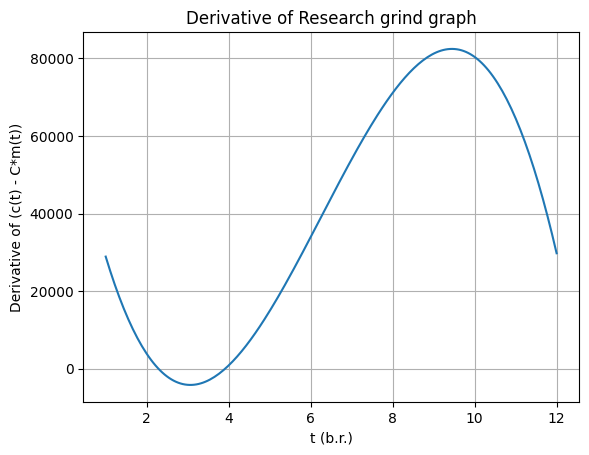

In [12]:
import numpy as np
C = 1

import matplotlib.pyplot as plt

# Define the derivative function
def derivative(t):
    return -666.51248*t**3 + 12509.2848*t**2 - 57899.82734*t + 74961.25748 - 0.154*C

# Generate x values from 1 to 12
x = np.linspace(1, 12, 200)

# Calculate y values using the derivative function
y = derivative(x)

# Plot the graph
plt.plot(x, y)
plt.xlabel('t (b.r.)')
plt.ylabel("Derivative of (c(t) - C*m(t))")
plt.title('Derivative of Research grind graph')
plt.grid(True)
plt.show()


As we can see the difference between the rate of growth increases the most around the 6 to 10 b.r.
The only b.r. where the modifiers grow more than the costs is around the 3 b.r.

## How to fix?

So I think I have laid out the sheer scale of the grind problem.
How should the economy be adjusted to address this issue and improve player experience?
Well this can be done in two ways.
Either adjust the modifiers, or costs.
First let's look at adjusting the costs curve to fix the grind.

### Cost adjustment

The easiest way we could adjust the cost curve would be to play around with the coefficients of the cost curve, and simply lower it's values.
However, that is boring.
One way grind can be curbed is by making modifiers grow at the same rate as costs.
Let's do that by fixing the difference in the rate of growth to a constant value.
Just like previously we are going to assume $C=1$ for simplicity's sake.

$$
(c(t) - m(t))' = 0 \\
c'(t) - 0.154 = 0 \\
c'(t) = 0.154
$$

So if we want the difference in the rate of change to be constant we need the derivative of c(t) to equal the derivative of m(t).
Let's find the integral of c'(t) to take a look at how such a function could look.

$$
\int c'(t)dt = \int 0.154dt = 0.154t + C'
$$

So identical to m(t), except for the C' argument.
This is the offset, that could be adjusted to statically fix the number of battles needed to unlock each vehicle, regardless of their br.
Naturally this wouldn't make for a good progression in a F2P game(or any game for that matter) for a multitude of reasons.
So let's make the progression linear(instead of cubic).

$$
(c(t) - m(t))' = t \\
c'(t) - 0.154 = t \\
c'(t) = t + 0.154 \\
\int c'(t)dt = \frac{t^2}{2} + 0.154t + C'
$$

With this version of the c(t) the b(t) would look like for C'=0:

$$
b_{alt} = \frac{\frac{t^2}{2} + 0.154t}{0.154t + 0.7329}
$$

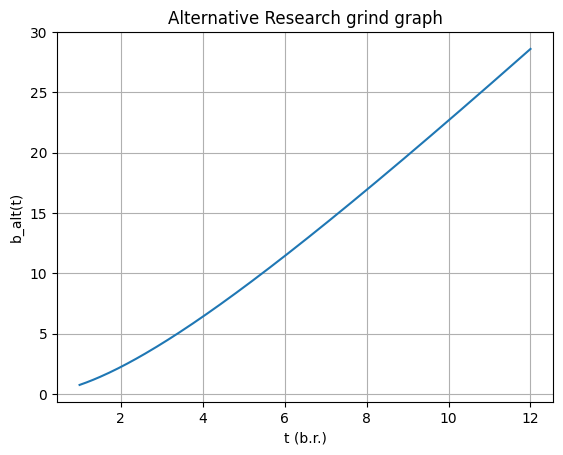

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define the b_alt function
def b_alt(t):
    return (t**2 / 2 + 0.154 * t) / (0.154 * t + 0.7329)

# Generate x values from 1 to 12
x = np.linspace(1, 12, 200)

# Calculate y values using the b_alt function
y = b_alt(x)

# Plot the graph
plt.plot(x, y)
plt.xlabel('t (b.r.)')
plt.ylabel('b_alt(t)')
plt.title('Alternative Research grind graph')
plt.grid(True)
plt.show()


Significantly more fair and linear.
Naturally I doubt Gaijin would accept even this, but a man can dream.

### Modifier adjustment

Naturally this would work in a much similar way, except instead of lowering the degree of the cost function, we would be increasing the degree of the modifiers function.
